# 1 Setup & Load Data ---->>

1.1 Import all dependencies ---->>

In [71]:
import tensorflow as tf
import os
import  cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

1.2 Remove Dodgy Images ------>>>

In [62]:
data_dir = "Data"         # data folder in data_dir --->>>

In [63]:
os.listdir(data_dir)      # it will show all the folders present in the data directory ----->>>

['happy', 'sad']

In [64]:
os.listdir(os.path.join(data_dir,'happy'))      # It will show all the image present in the haappy data directory ----->>>

['05-12-21-happy-people.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1_617fd1e2590c2.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '41740_hd.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '613k1XcpYCL.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '8e06de1bf2171da2312b6de61c61e4bc--baby-essentials-baby-baby.jpg',
 '988689_Wallpaper2.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'A_Sep20_14_1189155141.jpg',
 'compassion-900x387.jpg',
 'file-20230208-27-3jttof.jpg',
 'freedom-serenity-concept-female-model-ecstatic-enjoyment-mixed-race-34800382.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'GettyImages-871518740.jpg',
 'getty_107808336_9708069704500170_50554.jpg',
 'getty_152414899_970460970

In [65]:
os.listdir(os.path.join(data_dir,'sad'))      # It will show all the image present in the sad data directory ----->>>

['-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg',
 '0x0.jpg',
 '1000_F_124527256_XeXO1Q7xiE39ZcnuCOHTCotlj7p1FYwc.jpg',
 '121129_sad-people-png.png',
 '121132_sad-people-png.png',
 '314071_2200-732x549.jpg',
 '360_F_548848756_IlV9Y9HV8chb6mSuc3PBamYRT9gIn8Vo.jpg',
 '360_F_573380015_l5YdjSZuJqET7UWOHBVMhzT7J63O8hPq.jpg',
 '360_F_601507482_RbV0Vk2KSg72LkjkSZBJNpmxu6Y4Hdzw.jpg',
 '39843138-sad-man.jpg',
 '405-4050267_sad-people-png-sad-person-transparent-background-png.png',
 '5acf9ed1146e711e008b46d7.jpg',
 '73705bd7debb66c2afc780a22c223804.jpg',
 '7RNXwSxCAKL8vGtXG2ZkyD-1200-80.jpg',
 '8iAb9k4aT.jpg',
 'all-those-people-who-are-sad-17573-1.jpg',
 'anxious-man-indoors-front-view_23-2149729600.jpg',
 'blog-3.jpg',
 'cartoon-face-sad-negative-people-emotion-icon-vector-15011380.jpg',
 'clipart-resting-man-sad-person-silhouette-11562968626t91mbvbu9i.png',
 'crying-at-work.jpg',
 'dark-depression-mood-people-wallpaper-preview.jpg',
 'DealingwithDepressionwi

In [66]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [67]:
# Reading Image as a Numpy Array ------>>
img = cv2.imread(os.path.join('data','happy','_86a43964-aa8e-11e8-82d1-388e3d6e11aa.jpg'))

In [68]:
img.shape # image shape (height , width , channels_RGB) -------->>>>

(540, 960, 3)

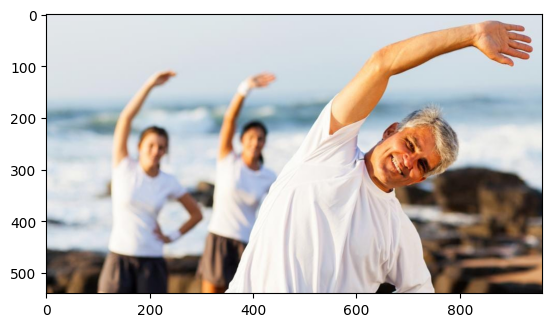

In [69]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # ploting Image using matplotlib ------->>
plt.show()

In [70]:
# REMOVING DODGY IMAGES ----->>>

for image_class in os.listdir(data_dir):  # happy or sad --->>
    for image in os.listdir(os.path.join(data_dir, image_class)): # images in image_class --->>
        image_path = os.path.join(data_dir, image_class, image) # every single image path ---->>>
        try:
            img = cv2.imread(image_path) # reading image as a numpy array -------->>>>
            tip = imghdr.what(image_path) # provide extension of image ------>>>
            if tip not in image_exts:                # checking image extension is present in image_ext or not ---------->>
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)            # if not so remove -------->>
        except Exception as e:                      # else raise exception ------->>>
            print('Issue with image {}'.formate(image_path))

1.3 Load Data Using tensorflow ---->>>

        # tf.kears.utils.image_dataset_from_directory()  -->> helps to load data from a directory and provide many facilities.

        #  image_dataset_from_directory() == >> automatically create labels for each image based on the name of the directory and do bunch of processing for us and we use keras for it as above mentioned.

In [74]:
data = tf.keras.utils.image_dataset_from_directory('Data') # building Data pipeline ---->>

Found 172 files belonging to 2 classes.


In [75]:
data_iterator = data.as_numpy_iterator() # converting into numpy array ---->>> and accessing the data.as_numpy_iterator

In [105]:
# get another batch from iterators ---->>
batch = data_iterator.next() # grabing 1 batch pack --->>

In [106]:
len(batch) # so  2 represents images and labels (1st images , 2nd labels)

2

In [107]:
# Images represented as numpy arrays --->>>
batch[0].shape      # 32 batch size ,  (256,256) size of image , 3 channels  

(12, 256, 256, 3)

In [108]:
batch[1]     # labels --->>

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0])

    Class 1 = SAD PPL -->>
    Class 0 = HAPPY PPL -->>

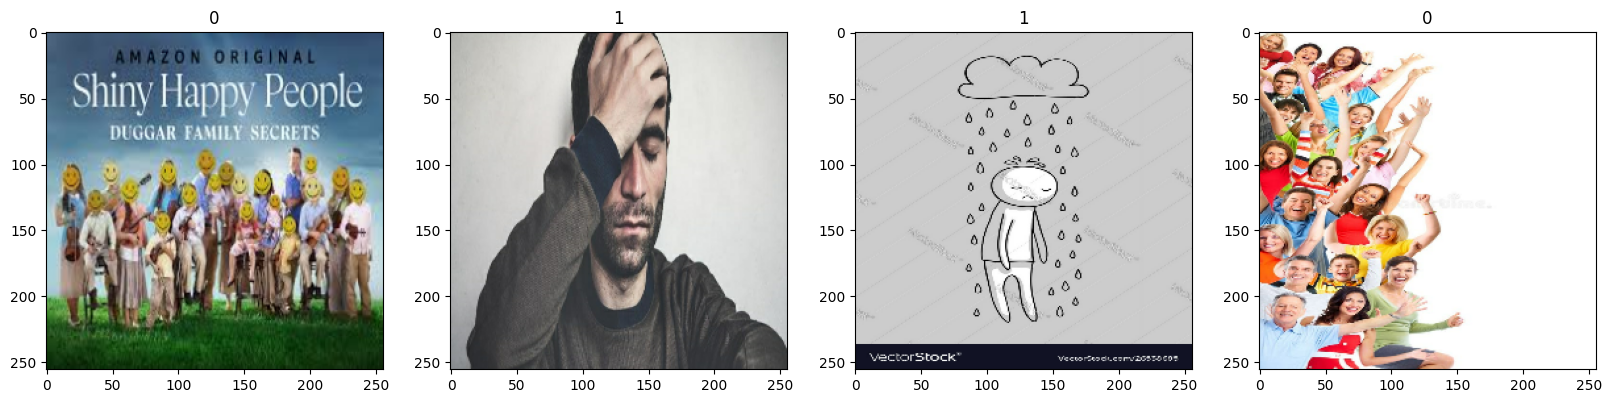

In [109]:
# plotted 4 image --->>

fig , ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2 Preprocess Data --->>